In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('parler_postsData.csv')
lf = df['Creator'].value_counts(normalize=True).iloc[0:10]*100
lf

 


8290766df6a5425faa789461eb5051d0    6.199847
1186902f79324fee8e08e5670026e67c    2.530950
4bdafdbc35f94816be2ee2647d684d74    1.379270
3cbff11cfb144f898949e94f260a21e5    1.083992
2bb8e3b7c8c446dd91c59274a619339b    0.975103
dd79944c7a9a4571b30f4433a879c391    0.947635
56105481a4f24e9ca8793ac1d097bb4d    0.904471
ffdf1fc30ac5416fa7cb2e6ad1d43291    0.899566
d6b275d38bc34e04ba4d147cc9cf8a6f    0.856403
d8351de608ea4442a8feeb58c4bd191a    0.829916
Name: Creator, dtype: float64

In [2]:
d1f=pd.DataFrame({'User ID':lf.index, 'Content Contribution %': lf.values})
d1f

User ID  Content Contribution %
0  8290766df6a5425faa789461eb5051d0                6.199847
1  1186902f79324fee8e08e5670026e67c                2.530950
2  4bdafdbc35f94816be2ee2647d684d74                1.379270
3  3cbff11cfb144f898949e94f260a21e5                1.083992
4  2bb8e3b7c8c446dd91c59274a619339b                0.975103
5  dd79944c7a9a4571b30f4433a879c391                0.947635
6  56105481a4f24e9ca8793ac1d097bb4d                0.904471
7  ffdf1fc30ac5416fa7cb2e6ad1d43291                0.899566
8  d6b275d38bc34e04ba4d147cc9cf8a6f                0.856403
9  d8351de608ea4442a8feeb58c4bd191a                0.829916

In [3]:
df2=pd.read_csv('parler_userData.csv')
df_merge=pd.merge(d1f,df2,left_on='User ID',right_on='Id')
df_merge

User ID  Content Contribution %  \
0  8290766df6a5425faa789461eb5051d0                6.199847   
1  1186902f79324fee8e08e5670026e67c                2.530950   
2  4bdafdbc35f94816be2ee2647d684d74                1.379270   
3  3cbff11cfb144f898949e94f260a21e5                1.083992   
4  2bb8e3b7c8c446dd91c59274a619339b                0.975103   
5  dd79944c7a9a4571b30f4433a879c391                0.947635   
6  56105481a4f24e9ca8793ac1d097bb4d                0.904471   
7  ffdf1fc30ac5416fa7cb2e6ad1d43291                0.899566   
8  d6b275d38bc34e04ba4d147cc9cf8a6f                0.856403   
9  d8351de608ea4442a8feeb58c4bd191a                0.829916   

                Name  Score                                Id  \
0   Duane Richardson  23000  8290766df6a5425faa789461eb5051d0   
1       @WakeUpMfers  16000  1186902f79324fee8e08e5670026e67c   
2           GameOver   9000  4bdafdbc35f94816be2ee2647d684d74   
3        Billyboy428  12000  3cbff11cfb144f898949e94f260a21e5   
4  Maryland Crabbing  15000  2bb8e3b7c8c446dd91c59274a619339b   
5         2ndPro1776   3100  dd79944c7a9a4571b30f4433a879c391   
6           LucidKeK  20000  56105481a4f24e9ca8793ac1d097bb4d   
7    Unravel_the_Web  10000  ffdf1fc30ac5416fa7cb2e6ad1d43291   
8   Grinnell Pioneer  10000  d6b275d38bc34e04ba4d147cc9cf8a6f   
9   🦉Reesey Kaminski  26000  d8351de608ea4442a8feeb58c4bd191a   

                                                 Bio          Joined  \
0  #Patriot , I believe in God, The Holy Bible, T...  20201107115354   
1  Let Your Life Be a Counter-Friction to Stop th...  20201127041453   
2                                                NaN  20190601002918   
3                                                NaN  20201108142211   
4  youtube.com/c/jakephelpsmarylandcrabbing Pleas...  20201225164602   
5  “We, too, born to freedom, and believing in fr...  20200629225305   
6  🇺🇸MAGA🇺🇸\n💥#WeThePeople💥\nRemoved from IG at 3...  20201110164009   
7                                                NaN  20201025003116   
8                                                NaN  20200528231128   
9  Idontwearmasks🐊get your gun🔫 ‼️⚔️🇺🇸⚔️\nPPL MUS...  20200529115318   

             Username  Interactions  Human  Verified  
0         Patriots4US           266   True     False  
1  TheRealWakeUpMfers           258  False     False  
2            GameOver           258  False     False  
3         Billyboy428           259   True     False  
4    marylandcrabbing           259   True     False  
5          2ndPro1776           259   True     False  
6            LucidKeK             3   True     False  
7       UnravelTheWeb           386  False     False  
8         GrinPioneer           259   True     False  
9     Reeseysnotsorry           258  False     False

Total content % generated by the top 10 users cumulatively : 16.60715336773333 %


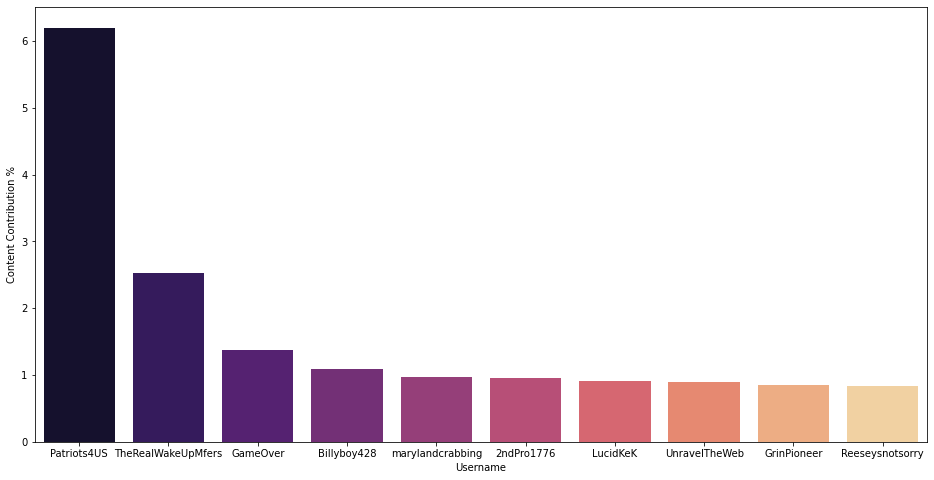

In [4]:
a=df_merge['Content Contribution %'].sum()
print("Total content % generated by the top 10 users cumulatively :",a,"%")
plt.figure(figsize=(16,8))
prnt=sns.barplot(y="Content Contribution %", x="Username",data=df_merge,palette="magma",dodge=False)

Total content % generated by the top 10 users cumulatively : 16.60715336773333 %


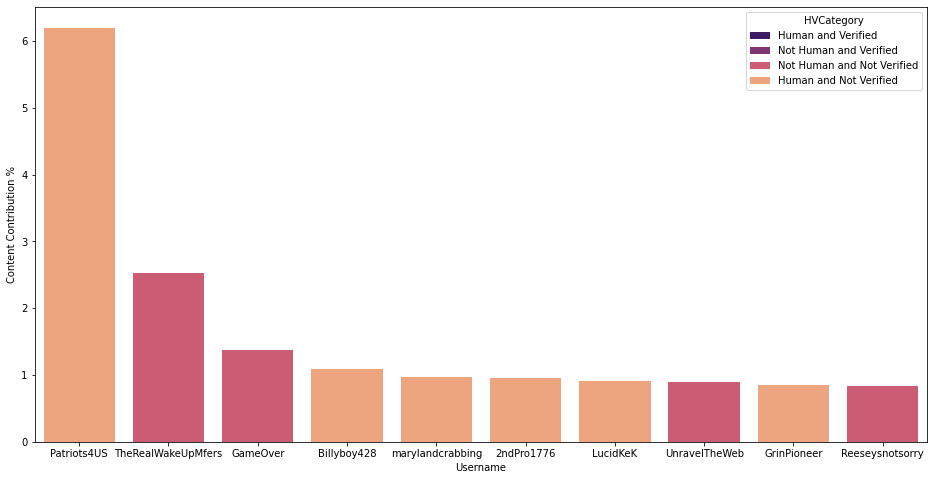

In [5]:
a=df_merge['Content Contribution %'].sum()
print("Total content % generated by the top 10 users cumulatively :",a,"%")

def barcolor(x):
    if (df_merge[df_merge.Username==x].Human.values[0]==True and df_merge[df_merge.Username==x].Verified.values[0]==True): 
        return "Human and Verified"
    elif (df_merge[df_merge.Username==x].Human.values[0]==False and df_merge[df_merge.Username==x].Verified.values[0]==True):
        return "Not Human and Verified"
    elif (df_merge[df_merge.Username==x].Human.values[0]==False and df_merge[df_merge.Username==x].Verified.values[0]==False):
        return "Not Human and Not Verified"
    elif (df_merge[df_merge.Username==x].Human.values[0]==True and df_merge[df_merge.Username==x].Verified.values[0]==False):
        return "Human and Not Verified"
    else :
        return ""
  

df_merge['HVCategory']=df_merge['Username'].apply(barcolor) 

plt.figure(figsize=(16,8))
prnt=sns.barplot(y="Content Contribution %", x="Username",data=df_merge,hue="HVCategory",hue_order=["Human and Verified","Not Human and Verified","Not Human and Not Verified","Human and Not Verified"],palette="magma",dodge=False)

#colours={"red":'red',"blue":'blue',"green":'green',"yellow":'yellow'}
#df_merge.plot(kind="bar",y="Content Contribution %", x="Username",color=df_merge['Color'].replace(colours))

Top 10 Usernames with most number of Upvotes:
                                 Name    Score       Username  Human  Verified
1                         Dan Bongino  6000000       Dbongino  False      True
2                          Mark Levin  5800000  Marklevinshow  False      True
3                        Sean Hannity  5700000    SeanHannity   True      True
4                            LLinWood  5200000        linwood  False      True
5                      Dinesh D’Souza  4500000   DineshDSouza  False      True
6                      Tommy Robinson  4000000  TommyRobinson  False      True
7                     The Epoch Times  3500000     epochtimes   True     False
8   We Love President Donald J. Trump  2000000    WeLoveTrump   True     False
9                             private  2000000      Redcode71   True     False
10                 The Gateway Pundit  2000000  GatewayPundit  False      True


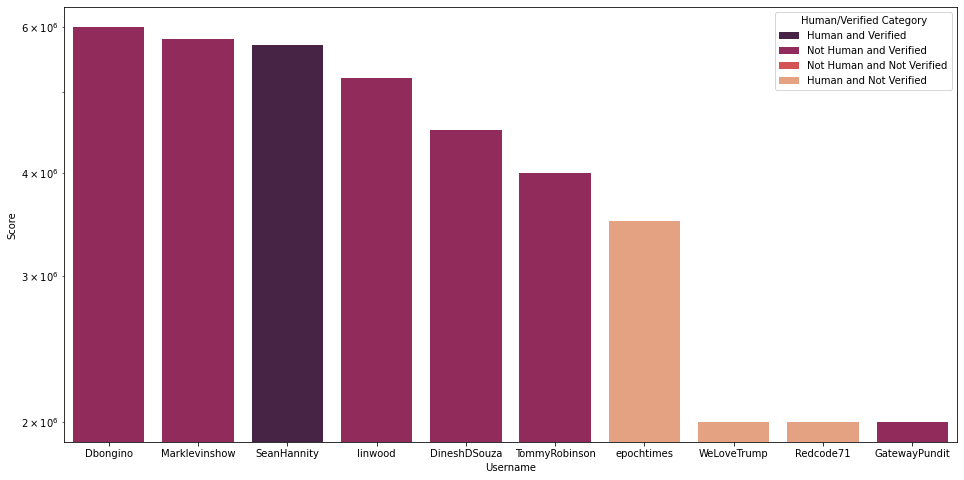

In [6]:
df = pd.read_csv('parler_userData.csv')
df2a1=df.sort_values(by=['Score'],ascending=False).iloc[0:10].reset_index()
df2a1.index=df2a1.index+1
print("Top 10 Usernames with most number of Upvotes:")
print(df2a1[['Name','Score','Username','Human','Verified']])


def barcolor(x):
    if (df2a1[df2a1.Username==x].Human.values[0]==True and df2a1[df2a1.Username==x].Verified.values[0]==True): 
        return "Human and Verified"
    elif (df2a1[df2a1.Username==x].Human.values[0]==False and df2a1[df2a1.Username==x].Verified.values[0]==True):
        return "Not Human and Verified"
    elif (df2a1[df2a1.Username==x].Human.values[0]==False and df2a1[df2a1.Username==x].Verified.values[0]==False):
        return "Not Human and Not Verified"
    elif (df2a1[df2a1.Username==x].Human.values[0]==True and df2a1[df2a1.Username==x].Verified.values[0]==False):
        return "Human and Not Verified"
    else :
        return ""

df2a1['Human/Verified Category']=df2a1['Username'].apply(barcolor) 

plt.figure(figsize=(16,8))
prnt=sns.barplot(y="Score", x="Username",data=df2a1,hue="Human/Verified Category",hue_order=["Human and Verified","Not Human and Verified","Not Human and Not Verified","Human and Not Verified"],palette="rocket",dodge=False)
prnt.set_yscale("log")


Top 10 Usernames with most number of Interactions:
                        Name  Interactions        Username  Human  Verified
1                 Mark Levin          8478   Marklevinshow  False      True
2                Amy Peikoff          6503      AmyPeikoff   True     False
3                     Parler          6407          parler  False      True
4   Parler Dev Announcements          6403       parlerdev  False      True
5                 oathk33per          6275      oathkeep3r   True     False
6                      Jared          6247           Jared  False      True
7               USMC Patriot          4131       OmegaGeek   True     False
8             Jeffreywernick          2307  Jeffreywernick   True     False
9              John Matze 🇺🇸          2151            John   True      True
10                  木兰传奇（文奇）          1410       Mulan2020  False     False


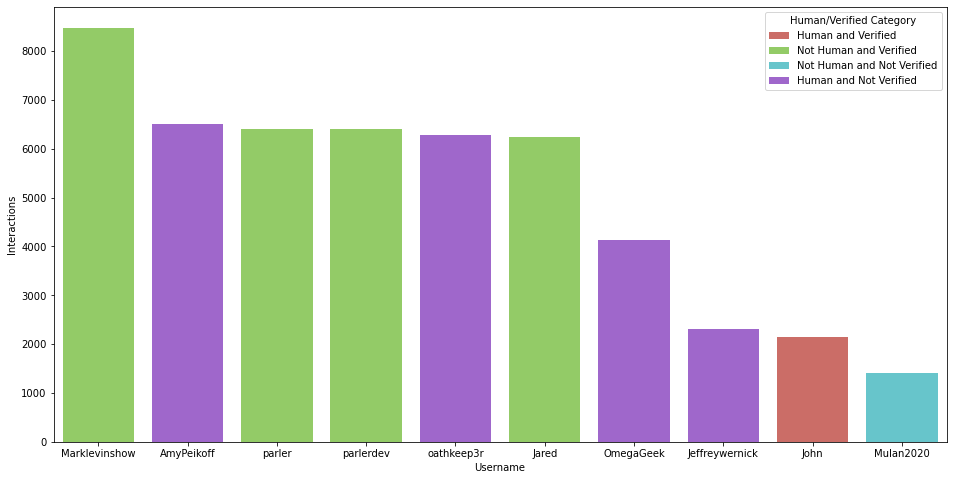

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('parler_userData.csv')
df2a2=df.sort_values(by=['Interactions'],ascending=False).iloc[0:10].reset_index()
df2a2.index=df2a2.index+1
print("Top 10 Usernames with most number of Interactions:")
print(df2a2[['Name','Interactions','Username','Human','Verified']])

def barcolor(x):
    if (df2a2[df2a2.Username==x].Human.values[0]==True and df2a2[df2a2.Username==x].Verified.values[0]==True): 
        return "Human and Verified"
    elif (df2a2[df2a2.Username==x].Human.values[0]==False and df2a2[df2a2.Username==x].Verified.values[0]==True):
        return "Not Human and Verified"
    elif (df2a2[df2a2.Username==x].Human.values[0]==False and df2a2[df2a2.Username==x].Verified.values[0]==False):
        return "Not Human and Not Verified"
    elif (df2a2[df2a2.Username==x].Human.values[0]==True and df2a2[df2a2.Username==x].Verified.values[0]==False):
        return "Human and Not Verified"
    else :
        return ""

df2a2['Human/Verified Category']=df2a2['Username'].apply(barcolor) 

plt.figure(figsize=(16,8))
prnt=sns.barplot(y="Interactions", x="Username",data=df2a2,hue="Human/Verified Category",hue_order=["Human and Verified","Not Human and Verified","Not Human and Not Verified","Human and Not Verified"],palette="hls",dodge=False)


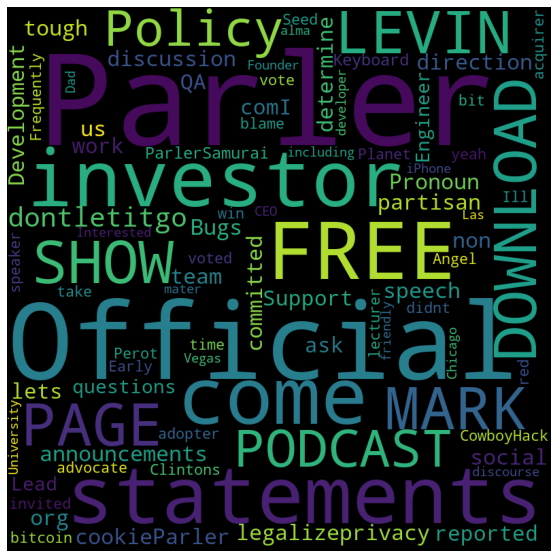

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessor as p
from wordcloud import WordCloud, STOPWORDS 

f_str=''

for ind in df2a2.index:
    a_str=df2a2['Bio'][ind]
    if(isinstance(a_str,str)==True):
        f_str=f_str+a_str

f_str=p.clean(f_str) #removes all the # and URL Emojis and other irrelevant content

f_str=f_str.replace("\n","")
f_str=f_str.replace("\\n","")

stopwords = set(STOPWORDS)
wc2b = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 14).generate(f_str)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc2b) 
plt.axis("off") 
  
plt.show() 

         Username  Human  Verified  Mentions
1       TeamTrump  False      True      3363
2         linwood  False      True      2802
3     SeanHannity   True      True      2185
4   Marklevinshow  False      True      2139
5        GenFlynn  False      True      1805
6   TuckerCarlson  False      True      1786
7           RudyG  False      True      1507
8         blocked  False     False      1130
9    DanScavino45  False      True      1103
10   SidneyPowell  False      True       859


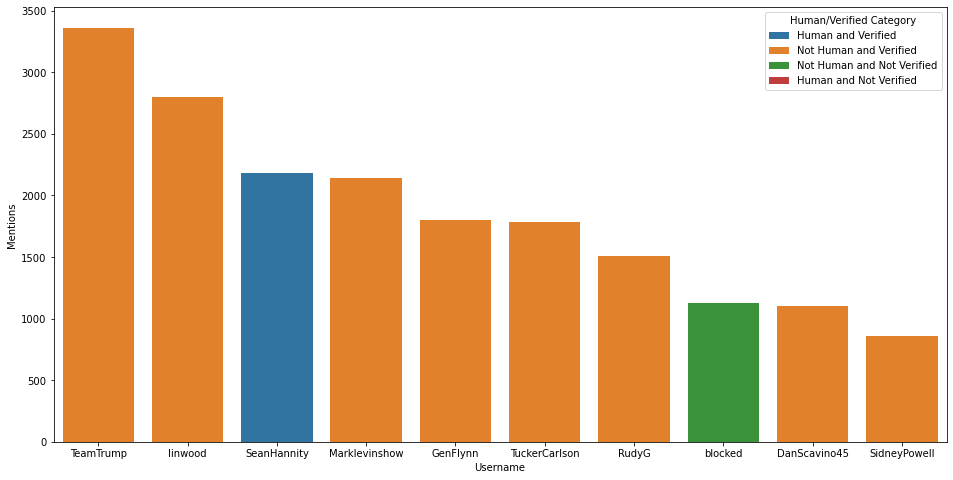

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('parler_postsData.csv')
udf= pd.read_csv('parler_userData.csv')
result={}
templist=[]
for ind in df.index:
    a=df['At'][ind]
    if(len(a)<=2):
        continue
    else:
        a_new=a[1:-1]
        temp=a_new.split(",")
        for x in range(0,len(temp)):
            temp[x]=temp[x].replace(' ','')
            temp1=temp[x].split(":")
            temp1[1]=temp1[1].replace("'","")
            templist.append(temp1[1])
            
d = {x:templist.count(x) for x in templist}  #count the number of instances of each element in the list
sorted_d = dict(sorted(d.items(), key=lambda item: item[1],reverse=True)[:10]) #sort the dictionary based on the values in descending order
find_df=pd.DataFrame(sorted_d.items(),columns=['User Details','Mentions'])

final_df_merge=pd.merge(find_df,udf,left_on='User Details',right_on='Id')
final_df_merge.reset_index()
final_df_merge.index=final_df_merge.index+1
print(final_df_merge[['Username','Human','Verified','Mentions']])

def barcolor(x):
    if (final_df_merge[final_df_merge.Username==x].Human.values[0]==True and final_df_merge[final_df_merge.Username==x].Verified.values[0]==True): 
        return "Human and Verified"
    elif (final_df_merge[final_df_merge.Username==x].Human.values[0]==False and final_df_merge[final_df_merge.Username==x].Verified.values[0]==True):
        return "Not Human and Verified"
    elif (final_df_merge[final_df_merge.Username==x].Human.values[0]==False and final_df_merge[final_df_merge.Username==x].Verified.values[0]==False):
        return "Not Human and Not Verified"
    elif (final_df_merge[final_df_merge.Username==x].Human.values[0]==True and final_df_merge[final_df_merge.Username==x].Verified.values[0]==False):
        return "Human and Not Verified"
    else :
        return ""

final_df_merge['Human/Verified Category']=final_df_merge['Username'].apply(barcolor) 

plt.figure(figsize=(16,8))
prnt=sns.barplot(y="Mentions", x="Username",data=final_df_merge,hue="Human/Verified Category",hue_order=["Human and Verified","Not Human and Verified","Not Human and Not Verified","Human and Not Verified"],palette="tab10",dodge=False)


        

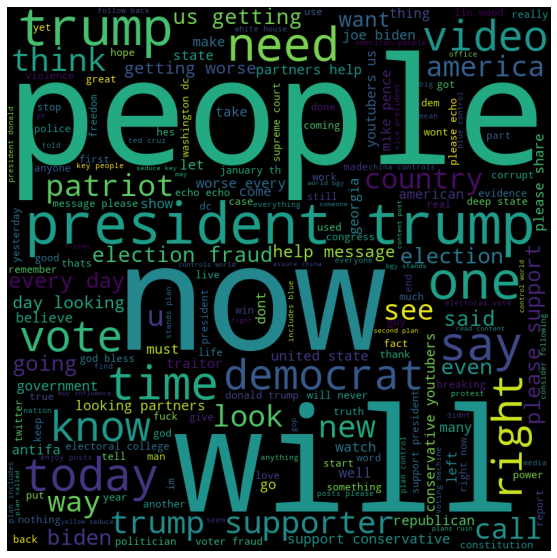

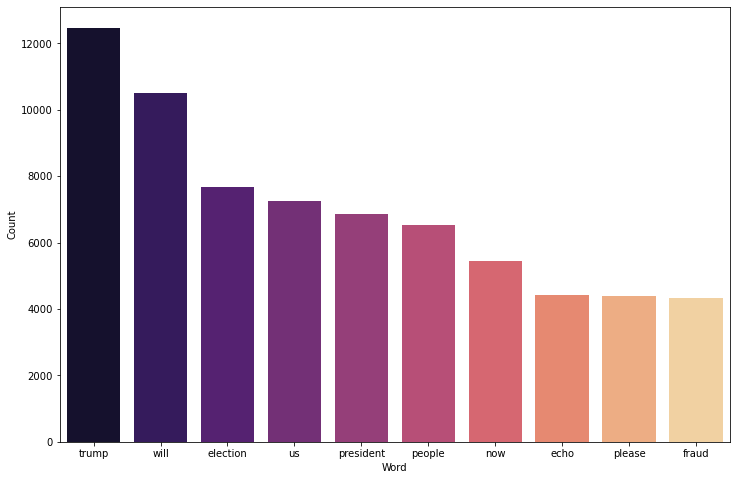

In [10]:
import pandas as pd
import seaborn as sns
import preprocessor as p
from wordcloud import WordCloud, STOPWORDS
import string 
from collections import Counter
import matplotlib.pyplot as plt
from pandas import DataFrame
#import nltk
#from nltk.corpus import stopwords

df = pd.read_csv('parler_postsData.csv')
df['Body'] = df['Body'].fillna('')
a_str=df['Body'].tolist()
f_str=" ".join(a_str)

f_str=p.clean(f_str)
f_str=f_str.replace("\n"," ").replace("\\n"," ")
f_str = f_str.translate(dict.fromkeys(map(ord, string.punctuation)))
f_str=f_str.lower()

finlis3a=f_str.split(" ")
finlis3a = [word for word in finlis3a if word not in (STOPWORDS)]
new_finlis3a=[]
for x in finlis3a:
    if(x!=''):
        new_finlis3a.append(x)

flis3a_str=" ".join(new_finlis3a)

wc2b = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10).generate(flis3a_str)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc2b) 
plt.axis("off") 
  
plt.show() 

counts = (Counter(new_finlis3a).most_common(10))

df3a = DataFrame (counts,columns=['Word','Count'])
df3a.reset_index()
df3a.index+=1
plt.figure(figsize=(12,8))
prnt=sns.barplot(x="Word", y="Count",data=df3a,palette="magma",dodge=False)






          Hashtag  Count
1    stopthesteal  77227
2            maga  58700
3       trump2020  51420
4           trump  46801
5      voterfraud  40541
6     donaldtrump  40238
7    election2020  29585
8   electionfraud  29387
9          parler  29244
10       patriots  26986


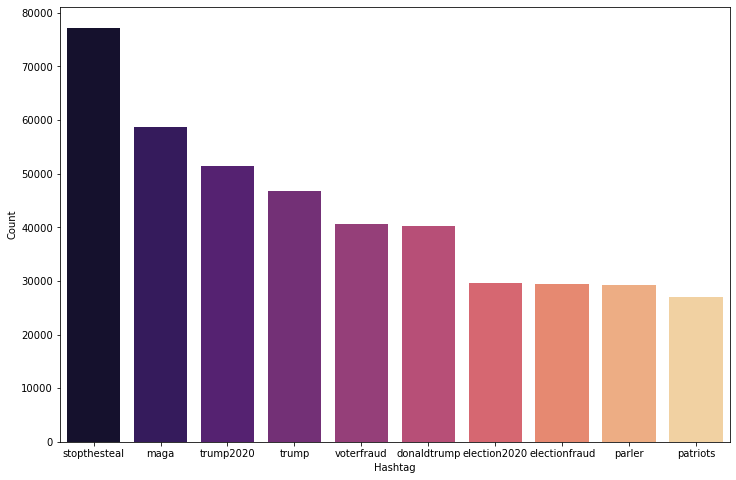

In [11]:
import pandas as pd
import seaborn as sns
import preprocessor as p
from wordcloud import WordCloud, STOPWORDS
import string 
from collections import Counter
import matplotlib.pyplot as plt
from pandas import DataFrame

df = pd.read_csv('parler_postsData.csv')
df['Body'] = df['Body'].fillna('')


hashtag_list = [] 
for ind in df.index:
    a=df['Body'][ind]
    a=a.replace("\n"," ").replace("\\n"," ")
    a = a.translate(dict.fromkeys(map(ord, "!\"$%&'()*.?+-,/:;<=>@[\]^_`{|}~")))
    a=a.lower()
    if(a!=''):
        for word in a.split():
            if word[0] == '#': 
                hashtag_list.append(word[1:])

counts = (Counter(hashtag_list).most_common(10))
count_3b = Counter(hashtag_list)

df3b = DataFrame (counts,columns=['Hashtag','Count'])
df3b.reset_index()
df3b.index+=1
print(df3b)
plt.figure(figsize=(12,8))
prnt=sns.barplot(x="Hashtag", y="Count",data=df3b,palette="magma",dodge=False)

              Hashtag  Average Post Length
1           dearnancy                190.0
2           partisans                168.0
3         bikersfor45                166.0
4         hangingchad                163.0
5   votebyslotmachine                163.0
6            sheeples                161.0
7           uspatriot                160.0
8             against                160.0
9        deepsatecoup                160.0
10   purposeofevasion                160.0


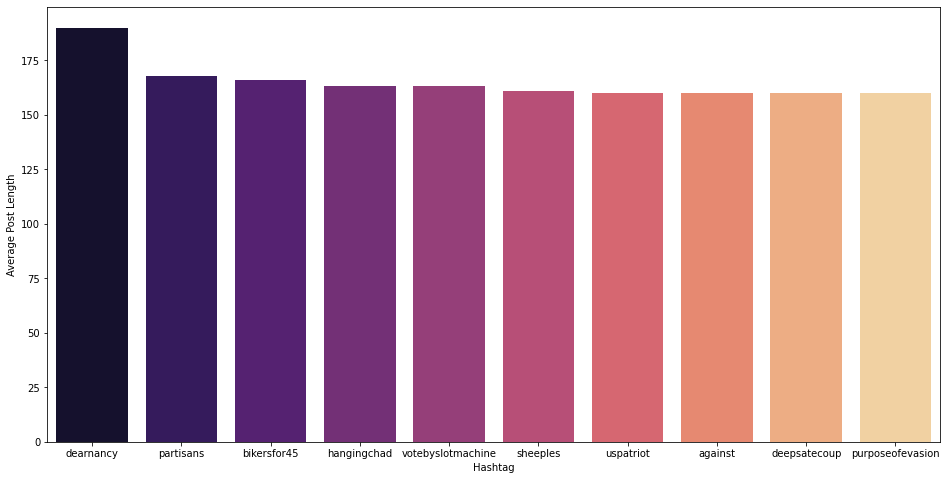

In [12]:
lis3b_Hashtag = {}
df = pd.read_csv('parler_postsData.csv')
df['Body'] = df['Body'].fillna('')
for ind in df.index:
    a=df['Body'][ind]
    a=a.replace("\n"," ").replace("\\n"," ")
    a=a.lower()
    a = a.translate(dict.fromkeys(map(ord, "!\"$%&'()*.?+-/:;,=>@[\]^_`{|}~")))
    words_a_len = len(p.clean(a).split())
    for j in a.split():
        if(j[0]=='#'):
            j=j[1:]
            if(j in lis3b_Hashtag == True):
                lis3b_Hashtag[j]+=words_a_len
            else:
                lis3b_Hashtag[j]=words_a_len
                
count_3b = Counter(hashtag_list)
#print(count_3b)
    
ans={}
    
for t in count_3b:
    ans[t]= lis3b_Hashtag[t]/count_3b[t]
        
    
ans_count3b = Counter(ans).most_common(10)

#print(ans_count3b)

df3b2 = DataFrame (ans_count3b,columns=['Hashtag','Average Post Length'])
df3b2.reset_index()
df3b2.index+=1
print(df3b2)
plt.figure(figsize=(16,8))
prnt=sns.barplot(x="Hashtag", y="Average Post Length",data=df3b2,palette="magma",dodge=False)    

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

postcount4 = {} #date to number of posts dict

pdf = pd.read_csv('parler_postsData.csv')

for ind in pdf.index:
    date=pdf['CreatedAt'][ind]
    date=str(date)
    date=date[:8]
    if(date in postcount4):
        postcount4[date]+=1
    else:
        postcount4[date]=1

#print(postcount4)
creationdate=[]
count=[]

for t in sorted(postcount4):
    count.append(postcount4[t])
    t=str(t)
    t=t[:4] + "-" + t[4:6] + "-" + t[6:]
    creationdate.append(t)
    

df=pd.DataFrame()
df.insert(0,'Creation Date',creationdate,True)
df.insert(1, 'Count',count, True)
df.reset_index()
df.index+=1

fig = go.Figure([go.Scatter(x=df['Creation Date'], y=df['Count'])])
fig.show()

In [14]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

joincount4 = {} #date to number of posts dict

udf = pd.read_csv('parler_userData.csv')

for ind in udf.index:
    date=udf['Joined'][ind]
    date=str(date)
    date=date[:8]
    if(date in joincount4):
        joincount4[date]+=1
    else:
        joincount4[date]=1

#print(postcount4)
joindate=[]
count=[]
for t in sorted(joincount4):
    count.append(joincount4[t])
    t=str(t)
    t=t[:4] + "-" + t[4:6] + "-" + t[6:]
    joindate.append(t)
    

df=pd.DataFrame()
df.insert(0,'Joining Date',joindate,True)
df.insert(1, 'Count',count, True)
df.reset_index()
df.index+=1

fig = go.Figure([go.Scatter(x=df['Joining Date'], y=df['Count'])])
fig.show()